# O1 – CIFAR-100 Data Exploration

Ce notebook explore le jeu de données CIFAR-100 :
- chargement du dataset,
- affichage de quelques images,
- inspection des labels et de leur distribution.

In [1]:
from pathlib import Path
import sys
import os

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# CWD = dossier du notebook (notebooks/)
cwd = Path.cwd()
print("CWD:", cwd)

# racine du projet = parent de notebooks/
project_root = cwd.parent
print("Project root:", project_root)

data_dir = project_root / "data"
print("Data dir:", data_dir)
data_dir.mkdir(exist_ok=True)


CWD: c:\Users\ADMIN\Desktop\Deep_Learning_Dev\cifar100_project\notebooks
Project root: c:\Users\ADMIN\Desktop\Deep_Learning_Dev\cifar100_project
Data dir: c:\Users\ADMIN\Desktop\Deep_Learning_Dev\cifar100_project\data


In [3]:
transform = transforms.ToTensor()  # simple pour l'exploration

train_dataset = datasets.CIFAR100(
    root=str(data_dir),
    train=True,
    download=True,   # télécharge si pas présent
    transform=transform
)

print("Taille du train set:", len(train_dataset))
print("Nombre de classes:", len(train_dataset.classes))
print("Quelques classes:", train_dataset.classes[:10])


Files already downloaded and verified
Taille du train set: 50000
Nombre de classes: 100
Quelques classes: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle']


Images shape: torch.Size([16, 3, 32, 32])
Labels shape: torch.Size([16])


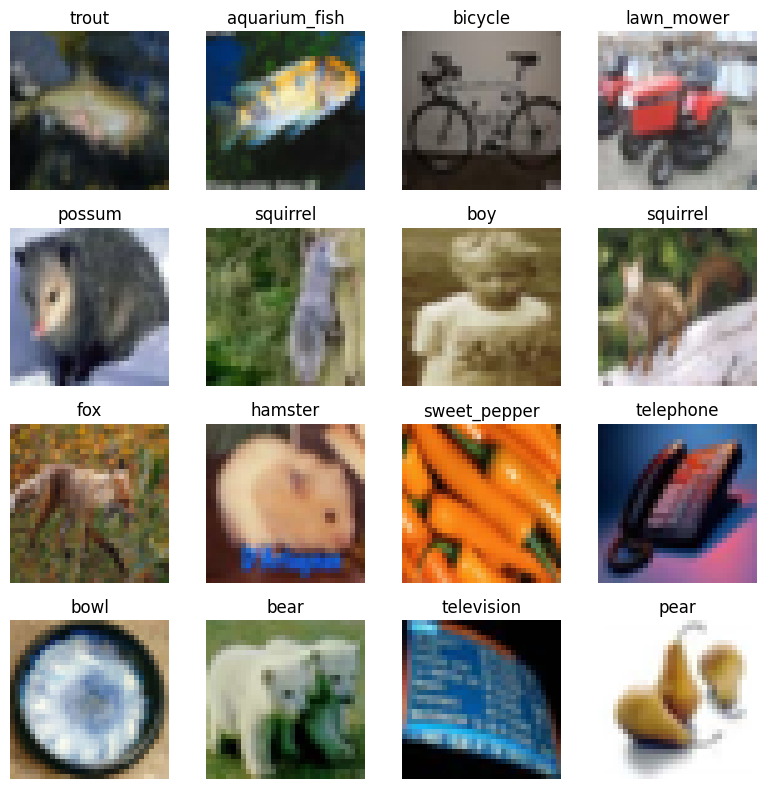

In [4]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

images, labels = next(iter(train_loader))
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

# Afficher 16 images (4x4)
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    img = images[i].numpy().transpose(1, 2, 0)
    plt.imshow(img)
    plt.axis("off")
    plt.title(train_dataset.classes[labels[i].item()])
plt.tight_layout()
plt.show()


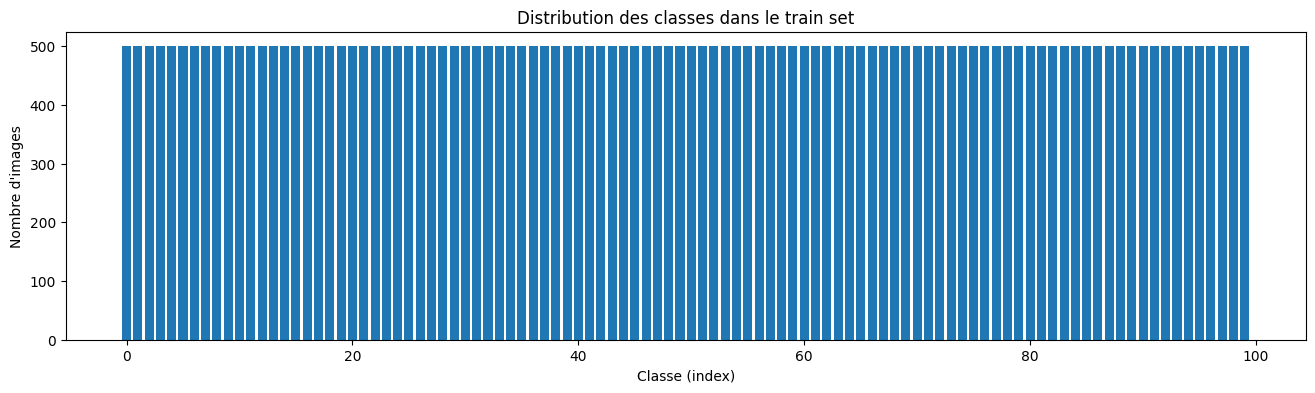

In [5]:
from collections import Counter

label_counts = Counter(train_dataset.targets)  # train_dataset.targets contient les labels bruts

counts = [label_counts[i] for i in range(len(train_dataset.classes))]

plt.figure(figsize=(16, 4))
plt.bar(range(len(counts)), counts)
plt.title("Distribution des classes dans le train set")
plt.xlabel("Classe (index)")
plt.ylabel("Nombre d'images")
plt.show()
